## Titanicデータ解析

### ライブラリのインポート

In [393]:
""" ライブラリのインポート
"""
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

### データの読み込みと、学習とテストデータの結合

In [394]:
""" データの読み込み
"""
train = pd.read_csv('./input/titanic/train.csv')
test = pd.read_csv('./input/titanic/test.csv')

""" データを一度結合
"""
data = pd.concat([train, test], sort=False)


### 欠損データの数を確認

In [395]:
print('空データ数')
print(data.isnull().sum())


空データ数
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


In [396]:
data[data['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


### 質データを数値データに変換

In [397]:
""" 性別を男性:0、女性:1に変換
"""
#data['Sex'].fillna(('male'), inplace=True)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1}).astype(int)

""" 乗船地を'S','C','Q'を0,1,2に変換
"""
data['Embarked'].fillna(('S'), inplace=True)
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)


### 欠損データを補完 データのクリーニング

In [398]:
""" 料金は平均値で補完
"""
data['Fare'].fillna(np.mean(data['Fare']), inplace=True)

""" 年齢と客室クラスは相関があるので、クラス毎の平均で補完
"""
data['Age'] = data.groupby('Pclass').transform(lambda d: d.fillna(d.mean()))['Age']

/tmp/ipykernel_1199/3195270422.py:7: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  data['Age'] = data.groupby('Pclass').transform(lambda d: d.fillna(d.mean()))['Age']


### データ補完後の欠損データ数

In [399]:
print('空データ数')
print(data.isnull().sum())


空データ数
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64


### 客室クラス 比較

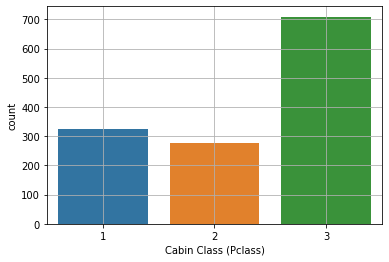

In [400]:
sns.countplot(data=data, x='Pclass')
plt.xlabel('Cabin Class (Pclass)')
plt.grid(True)

### 生存者・死亡者比

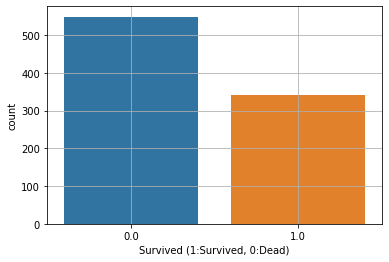

In [401]:
sns.countplot(data=data, x='Survived')
plt.xlabel('Survived (1:Survived, 0:Dead)')
plt.grid(True)

### 男女数 比較

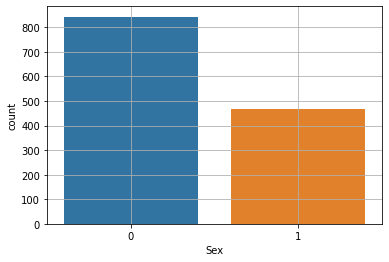

In [402]:
sns.countplot(data=data, x='Sex')
plt.xlabel('Sex')
plt.grid(True)

### 年齢の分布

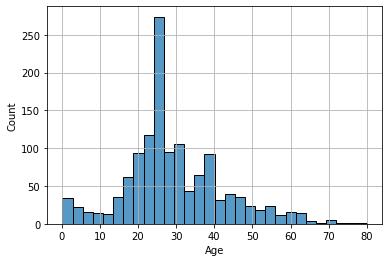

In [403]:
sns.histplot(data=data, x='Age')
plt.xlabel('Age')
plt.grid(True)

### 乗船地 比較

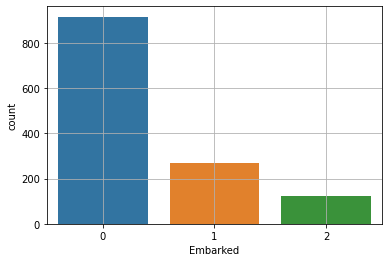

In [404]:
sns.countplot(data=data, x='Embarked')
plt.xlabel('Embarked')
plt.grid(True)

### チケット料金 分布

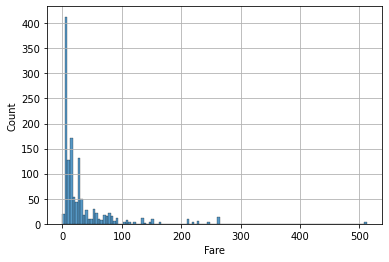

In [405]:
sns.histplot(data=data, x='Fare')
plt.xlabel('Fare')
plt.grid(True)

### 50歳以上の生存比率

<AxesSubplot:xlabel='Survived', ylabel='count'>

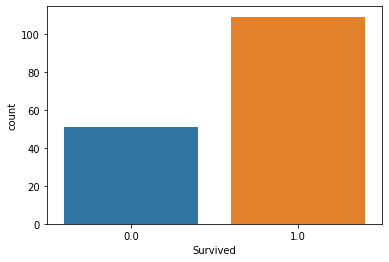

In [416]:
sns.countplot(data=data[data['Fare'] > 50], x='Survived')

### チケット料金と性別と生存率の関係

<AxesSubplot:xlabel='Survived', ylabel='count'>

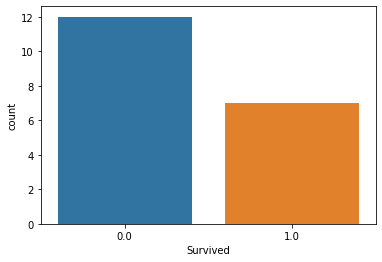

In [407]:
""" 料金ごとに生存数がどのように違うかを視覚化
"""
sns.countplot(data=data[(data['Fare'] > 100) & (data['Sex'] == 0)], x='Survived')

### 各変数の相関を確認

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000  0.110153 -0.082977 -0.001252  0.042221 -0.079741   
Survived        0.110153  1.000000 -0.033032  0.548320 -0.232924  0.132599   
Pclass         -0.082977 -0.033032  1.000000  0.055758 -0.318563 -0.084097   
Sex            -0.001252  0.548320  0.055758  1.000000 -0.171627  0.144033   
Age             0.042221 -0.232924 -0.318563 -0.171627  1.000000 -0.160939   
SibSp          -0.079741  0.132599 -0.084097  0.144033 -0.160939  1.000000   
Parch          -0.063456  0.038081  0.058366  0.103543 -0.276572  0.265411   
Fare            0.017243  0.128306 -0.311713  0.136973 -0.085007  0.290696   
Embarked       -0.032551  0.092673 -0.090961  0.082240  0.044832  0.030282   

                Parch      Fare  Embarked  
PassengerId -0.063456  0.017243 -0.032551  
Survived     0.038081  0.128306  0.092673  
Pclass       0.058366 -0.311713 -0.090961  
Sex          0.103543  0.136973  0.082240  

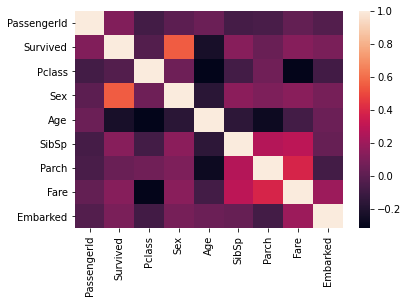

In [408]:
""" 全体ヒートマップ
"""
sns.heatmap(data.dropna().corr())
print(data.dropna().corr())

             PassengerId  Survived    Pclass  Sex       Age     SibSp  \
PassengerId     1.000000 -0.008790 -0.066358  NaN  0.081516 -0.046699   
Survived       -0.008790  1.000000 -0.477114  NaN  0.128290 -0.263284   
Pclass         -0.066358 -0.477114  1.000000  NaN -0.450072  0.099288   
Sex                  NaN       NaN       NaN  NaN       NaN       NaN   
Age             0.081516  0.128290 -0.450072  NaN  1.000000 -0.145492   
SibSp          -0.046699 -0.263284  0.099288  NaN -0.145492  1.000000   
Parch           0.034852 -0.223644  0.105077  NaN -0.088275  0.278316   
Fare            0.062873  0.218466 -0.618673  NaN  0.276999  0.081558   
Embarked        0.037641  0.109562  0.111404  NaN -0.018490 -0.194458   

                Parch      Fare  Embarked  
PassengerId  0.034852  0.062873  0.037641  
Survived    -0.223644  0.218466  0.109562  
Pclass       0.105077 -0.618673  0.111404  
Sex               NaN       NaN       NaN  
Age         -0.088275  0.276999 -0.018490  
SibSp

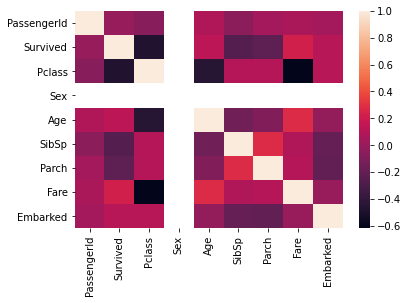

In [410]:
""" ヒートマップ
"""
sns.heatmap(data[data['Sex'] == 1].corr())
print(data[data['Sex'] == 1].corr())

### 客室クラスと料金の関係を箱ひげ図で表現

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

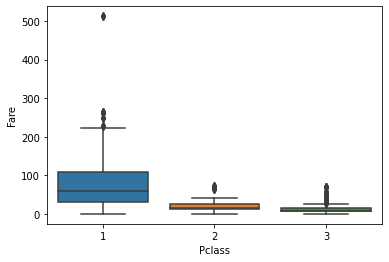

In [411]:
""" 客室クラスと料金の関係を箱ひげ図で表現
"""
sns.boxplot(data=data, x='Pclass', y='Fare')

### 客室クラスと料金の関係を数値で表現

In [412]:
""" 客室クラスと料金の関係を数値で表現
"""
print('一等客室料金\n', data[(data['Pclass'] == 1) & (data['Fare'] != 0)].dropna()['Fare'].describe())
print('二等客室料金\n', data[(data['Pclass'] == 2) & (data['Fare'] != 0)].dropna()['Fare'].describe())
print('三等客室料金\n', data[(data['Pclass'] == 3) & (data['Fare'] != 0)].dropna()['Fare'].describe())

一等客室料金
 count    173.000000
mean      87.303276
std       75.442832
min        5.000000
25%       35.500000
50%       69.300000
75%       93.500000
max      512.329200
Name: Fare, dtype: float64
二等客室料金
 count    16.000000
mean     18.063544
std       9.915756
min      10.500000
25%      11.887500
50%      13.000000
75%      26.000000
max      39.000000
Name: Fare, dtype: float64
三等客室料金
 count    12.000000
mean     11.698608
std       4.728981
min       7.650000
25%       7.725000
50%      10.462500
75%      13.531250
max      22.358300
Name: Fare, dtype: float64


## Group Byを使って解析

In [413]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [414]:
data.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            408, 409, 410, 411, 412, 413, 414, 415, 416, 417],
           dtype='int64', length=1309)

In [415]:
data.groupby(['Survived','Sex']).mean()

PassengerId    Pclass        Age     SibSp     Parch       Fare  \
Survived Sex                                                                    
0.0      0     449.121795  2.476496  30.608968  0.440171  0.207265  21.960993   
         1     434.851852  2.851852  24.998497  1.209877  1.037037  23.024385   
1.0      0     475.724771  2.018349  27.658994  0.385321  0.357798  40.821484   
         1     429.699571  1.918455  28.819150  0.515021  0.515021  51.938573   

              Embarked  
Survived Sex            
0.0      0    0.303419  
         1    0.333333  
1.0      0    0.321101  
         1    0.506438